### **MENGAMBIL DATA**

In [311]:
!pip install -q Kaggle

In [312]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [313]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [314]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [315]:
import zipfile

path_to_zip_file = "/content/bike-sharing-dataset.zip"

with zipfile.ZipFile(path_to_zip_file, "r") as zip_ref:
    zip_ref.extractall()


# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yulianto Aryaseta
- **Email:** yuliantoseta@gmail.com
- **ID Dicoding:** yulianto_aryaseta

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan sewa sepeda setiap harinya?
- Bagaimana pengaruh kondisi cuaca dengan jumlah sepeda yang disewa?
- Berapa banyak sepeda yang disewa pada hari libur dan hari kerja?
- Bagaimana perbandingan sepeda yang disewa pada tiap musim?
- Berapa banyak sepeda yang disewa tiap bulannya?
- Bagaimana perkembangan jumlah sewa sepeda tiap bulan?

## Import Semua Packages/Library yang Digunakan

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [317]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [318]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat 2 file data, yaitu data sewa perhari dan perjam
- Data perhari memiliki 16 fitur sementara data perjam memiliki 17 fitur

### Assessing Data

In [319]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [320]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [321]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [322]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [323]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [324]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Pada kedua data tidak terdapat duplikat, missing value, dan inacurate value
- Terdapat kesalahan tipe data pada kolom "dteday"
- Nama tahun, hari, bulan, musim, dan kondisi cuaca masih dalam indeks angka


### Cleaning Data

**Mengubah angka menjadi keterangan pada dua data**

In [325]:
# Mengubah angka menjadi keterangan pada day_df

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubah tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [326]:
# Mengubah angka menjadi keterangan pada hour_df

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubah tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**MENGUBAH TIPE DATA KOLOM "dteday" PADA kedua data**

In [327]:
#MENGUBAH TIPE DATA KOLOM "dteday" PADA day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [328]:
#MENGUBAH TIPE DATA KOLOM "dteday" PADA hour_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [329]:
#Menyimpan data yang sudah dibersihkan
day_df.to_csv("/content/cleaned_bikeshare_day.csv", index=False)
hour_df.to_csv("/content/cleaned_bikeshare_hour.csv", index=False)

**Insight:**
- Mengubah indeks angka pada data
- Mengubah tipe data kolom "dteday" menjadi datetime
- Menyimpan data yang sudah dibersihkan

## Exploratory Data Analysis (EDA)

In [330]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
605,606,2012-08-28,Fall,2012,Aug,0,Tue,Workingday,Clear/Partly Cloudy,0.728333,0.666050,0.620000,0.190925,935,6105,7040
171,172,2011-06-21,Fall,2011,Jun,0,Tue,Workingday,Misty/Cloudy,0.680833,0.637646,0.770417,0.171025,774,4061,4835
684,685,2012-11-15,Winter,2012,Nov,0,Thu,Workingday,Misty/Cloudy,0.321667,0.324492,0.620417,0.152987,320,5125,5445
324,325,2011-11-21,Winter,2011,Nov,0,Mon,Workingday,Light Snow/Rain,0.447500,0.445062,0.910000,0.138054,220,2545,2765
697,698,2012-11-28,Winter,2012,Nov,0,Wed,Workingday,Clear/Partly Cloudy,0.296667,0.289762,0.506250,0.210821,198,5062,5260


**Mengelompokkan Tren Penyewaan Sepeda Berdasarkan Tahun**


In [331]:
#Mengelompokkan tren sewa pertahun berdasarkan jenis kelompok
day_df.groupby('yr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
})

<ipython-input-331-4d67938daad9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('yr').agg({


,casual,registered,cnt
yr,,,
2011,677.402740,2728.358904,3405.761644
2012,1018.483607,4581.450820,5599.934426


**Mengelompokkan Tren Penyewaan Berdasarkan Musim**

In [332]:
#Mengelompokkan tren sewa berdasarkan musim
day_df.groupby('season').agg({
    'cnt': 'mean'
})

<ipython-input-332-61531028fb51>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season').agg({


,cnt
season,
Fall,5644.303191
Spring,2604.132597
Summer,4992.331522
Winter,4728.162921


**Mengelompokkan Tren Penyewaan Berdasarkan Bulan**

In [333]:
#Mengelompokkan tren sewa berdasarkan bulan
day_df.groupby('mnth').agg({
    'cnt': 'mean'
})

<ipython-input-333-c8996c03446e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('mnth').agg({


,cnt
mnth,
Apr,4484.900000
Aug,5664.419355
Dec,3403.806452
Feb,2655.298246
Jan,2176.338710
Jul,5563.677419
Jun,5772.366667
Mar,3692.258065
May,5349.774194


**Mengelompokkan Tren Penyewaan Berdasarkan Hari**

In [334]:
#Mengelompokkan tren sewa berdasarkan hari
day_df.groupby('weekday').agg({
    'cnt': 'mean'
})

<ipython-input-334-ff2b3d29a834>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weekday').agg({


,cnt
weekday,
Fri,4690.288462
Mon,4338.123810
Sat,4550.542857
Sun,4228.828571
Thu,4667.259615
Tue,4510.663462
Wed,4548.538462


**Mengelompokkan Tren Penyewaan Berdasarkan Jenis Hari**


In [335]:
#Mengelompokkan tren sewa berdasarkan jenis hari
day_df.groupby('workingday').agg({
    'cnt': 'mean'
})

<ipython-input-335-8fdd0685a3d0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('workingday').agg({


,cnt
workingday,
Holiday,4330.168831
Workingday,4584.820000


**Mengelompokkan Tren Penyewaan Berdasarkan Keadaan Cuaca**

In [336]:
#Mengelompokkan tren sewa berdasarkan keadaan cuaca
day_df.groupby('weathersit').agg({
    'cnt': 'mean'
})

<ipython-input-336-cedc1182e58c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weathersit').agg({


,cnt
weathersit,
Clear/Partly Cloudy,4876.786177
Light Snow/Rain,1803.285714
Misty/Cloudy,4035.862348


Menghitung Tren Penyewaan untuk Masing-Masing Jenis Penyewa (Casual) dan (Registered)

In [337]:
# Menghitung trend untuk masing-masing jenis penyewa
# Menghitung mean dan sum untuk masing-masing kolom
mean_cnt = day_df['cnt'].mean()
mean_casual = day_df['casual'].mean()
mean_registered = day_df['registered'].mean()

sum_cnt = day_df['cnt'].sum()
sum_casual = day_df['casual'].sum()
sum_registered = day_df['registered'].sum()

# Membuat DataFrame untuk menyimpan hasil perbandingan mean dan sum
comparison_df = pd.DataFrame({
    'Metric': ['Mean', 'Sum'],
    'Cnt': [mean_cnt, sum_cnt],
    'Casual': [mean_casual, sum_casual],
    'Registered': [mean_registered, sum_registered]
})

# Menampilkan perbandingan
print(comparison_df)

  Metric           Cnt         Casual    Registered
0   Mean  4.504349e+03     848.176471  3.656172e+03
1    Sum  3.292679e+06  620017.000000  2.672662e+06


**Menghitung Statistik Deskriptif untuk Kolom `temp`**

In [338]:
# Menghitung statistik deskriptif untuk kolom 'temp'
min_temp = day_df['temp'].min()
max_temp = day_df['temp'].max()
mean_temp = day_df['temp'].mean()
std_temp = day_df['temp'].std()

# Membuat DataFrame perbandingan
comparison_df = pd.DataFrame({
    'Metric': ['Min Temp', 'Max Temp', 'Mean Temp', 'Std Temp'],
    'Value': [min_temp, max_temp, mean_temp, std_temp]
})

# Menampilkan perbandingan
print(comparison_df)

      Metric     Value
0   Min Temp  0.059130
1   Max Temp  0.861667
2  Mean Temp  0.495385
3   Std Temp  0.183051


**Menghitung Statistik Deskriptif untuk Kolom `hum`**

In [339]:
# Menghitung statistik deskriptif untuk kolom 'hum'
min_hum = day_df['hum'].min()
max_hum = day_df['hum'].max()
mean_hum = day_df['hum'].mean()
std_hum = day_df['hum'].std()

# Membuat DataFrame perbandingan
comparison_df = pd.DataFrame({
    'Metric': ['Min Hum', 'Max Hum', 'Mean Hum', 'Std Hum'],
    'Value': [min_hum, max_hum, mean_hum, std_hum]
})

# Menampilkan perbandingan
print(comparison_df)

     Metric     Value
0   Min Hum  0.000000
1   Max Hum  0.972500
2  Mean Hum  0.627894
3   Std Hum  0.142429


**Menghitung Statistik Deskriptif untuk Kolom `windspeed`**

In [340]:
# Menghitung statistik deskriptif untuk kolom 'windspeed'
min_windspeed = day_df['windspeed'].min()
max_windspeed = day_df['windspeed'].max()
mean_windspeed = day_df['windspeed'].mean()
std_windspeed = day_df['windspeed'].std()

# Membuat DataFrame perbandingan
comparison_df = pd.DataFrame({
    'Metric': ['Min Windspeed', 'Max Windspeed', 'Mean Windspeed', 'Std Windspeed'],
    'Value': [min_windspeed, max_windspeed, mean_windspeed, std_windspeed]
})

# Menampilkan perbandingan
print(comparison_df)

           Metric     Value
0   Min Windspeed  0.022392
1   Max Windspeed  0.507463
2  Mean Windspeed  0.190486
3   Std Windspeed  0.077498


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan sewa sepeda setiap harinya?



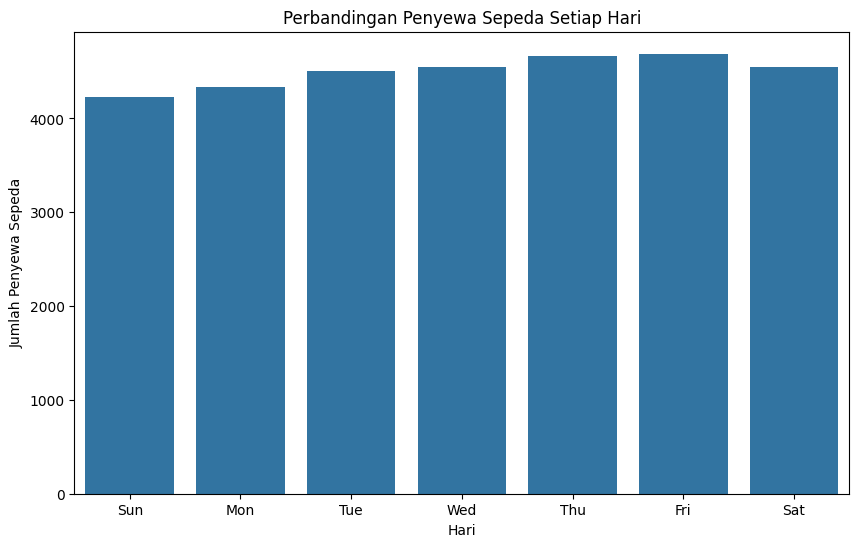

In [341]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df,
    order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
    edgecolor='none',
    errorbar=None )

plt.title('Perbandingan Penyewa Sepeda Setiap Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca dengan jumlah sepeda yang disewa?

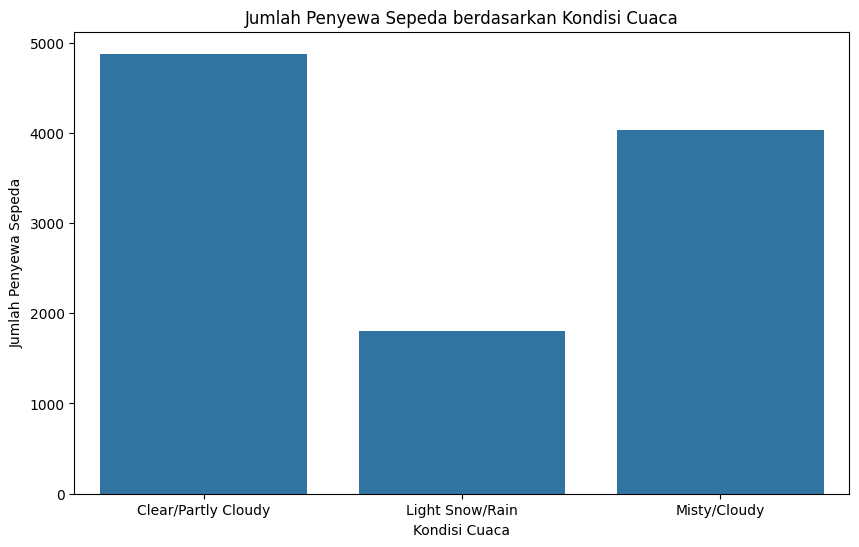

In [342]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    errorbar=None )

plt.title('Jumlah Penyewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 3: Berapa banyak sepeda yang disewa pada hari libur dan hari kerja?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


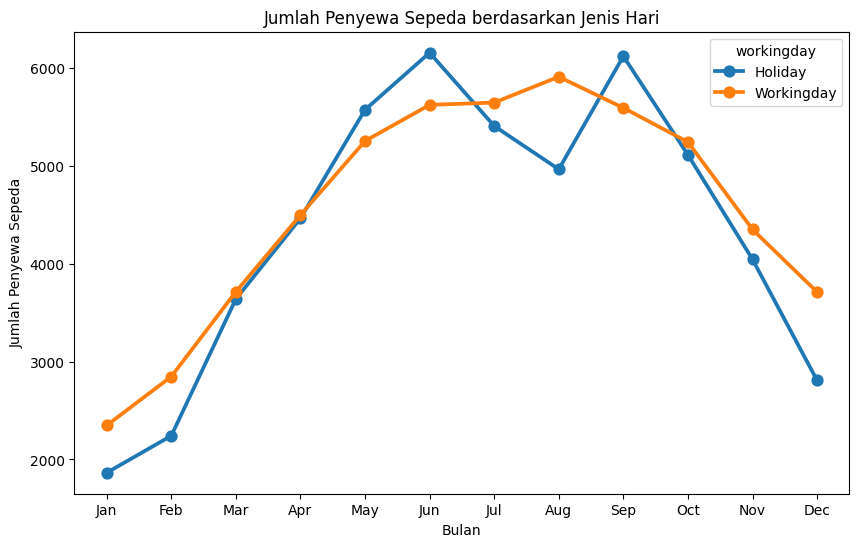

In [343]:
plt.figure(figsize = (10,6))
sns.pointplot(data = day_df ,
              x ='mnth' ,
              y ='cnt',
              hue = 'workingday',
              order=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
              errorbar=None)

plt.title('Jumlah Penyewa Sepeda berdasarkan Jenis Hari')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 4: Bagaimana perbandingan sepeda yang disewa pada tiap musim?

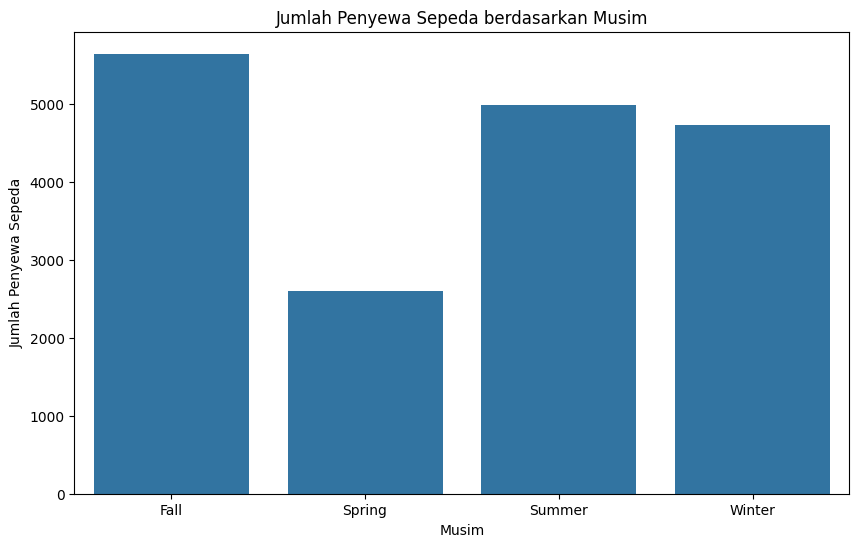

In [344]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='cnt',
    data=day_df,
    errorbar=None )

plt.title('Jumlah Penyewa Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 5: Berapa banyak sepeda yang disewa tiap bulannya?

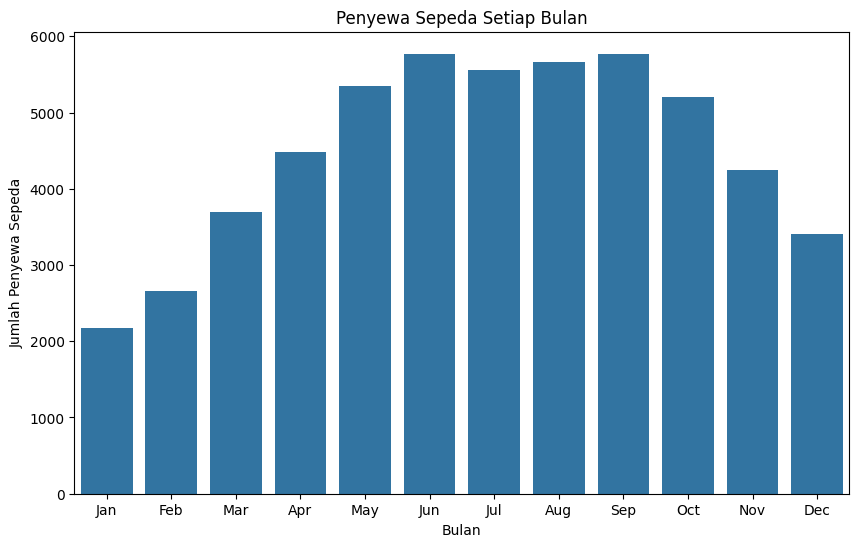

In [345]:
plt.figure(figsize = (10,6))
sns.barplot(data = day_df ,
            x= 'mnth',
            y = 'cnt',
            order=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
            errorbar=None)

plt.title('Penyewa Sepeda Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 6: Bagaimana perkembangan jumlah sewa sepeda tiap bulan?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


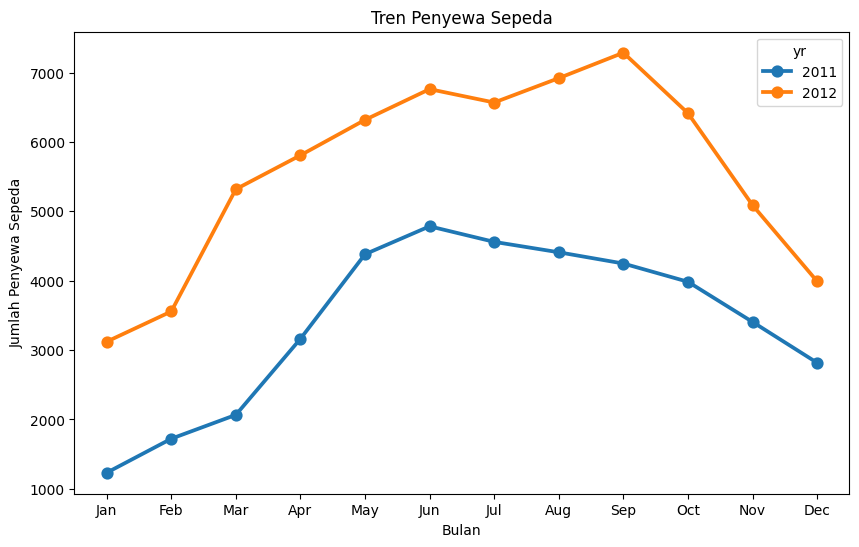

In [346]:
plt.figure(figsize = (10,6))
sns.pointplot(data = day_df ,
              x ='mnth' ,
              y ='cnt',
              hue = 'yr',
              order=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
              errorbar=None)

plt.title('Tren Penyewa Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

## Conclusion

### Pertanyaan 1: Bagaimana perbandingan sewa sepeda setiap harinya?

Tidak ada pebedaan jumlah yang signifikan antara satu hari dengan hari lainnya. Hari dengan jumlah Penyewa terbanyak adalah hari Jumat. Jumlah Penyewa meningkat secara signifikan dihari kerja antara hari Minggu sampai dengan Jumat, kemudian menurun di hari Sabtu. Hal ini menunjukkan bahwa rata-rata peesewa menggunakannya untuk bekerja.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca dengan jumlah sepeda yang disewa?

Penyewa paling banyak adalah ketika cuaca cerah atau sedikit berawan dan Penyewa paling sedikit adalah ketika hujan atau hujan salju ringan. Sementara ketika hujan badai tidak ada satupun Penyewa.

### Pertanyaan 3: Berapa banyak sepeda yang disewa pada hari libur dan hari kerja?

Sepeda yang disewa pada hari libur terus meningkat dimulai ketika awal tahun hingga bulan Juni, lalu menurun hingga bulan Agustus dan naik sebentar ketika bulan September, lalu akhirnya menurun secara konstan hingga bulan Desember. Untuk jumlah Penyewa pada hari kerja meningkat konstan dari awal tahun hingga titik tertinggi pada bulan Agustus lalu menurun konstan hingga bulan Desember.

### Pertanyaan 4: Bagaimana perbandingan sepeda yang disewa pada tiap musim?


Pola penyewaan sepeda menunjukkan peningkatan secara bertahap tiap musim. Musim semi menjadi yang terendah, diikuti peningkatan pada musim panas dan musim gugur, yang merupakan musim dengan jumlah penyewaan tertinggi. Namun, pada musim dingin, penyewaan sepeda mengalami sedikit penurunan.

### Pertanyaan 5: Berapa banyak sepeda yang disewa tiap bulannya?

Secara keseluruhan, jumlah peminjaman sepeda cenderung meningkat dari awal tahun hingga mencapai puncaknya di sekitar bulan Agustus atau September. Setelah itu, jumlah peminjaman mulai menurun.

### Pertanyaan 6: Bagaimana perkembangan jumlah sewa sepeda tiap bulan?

Pada tahun 2011 penyewaan sepeda meningkat signifikan dari bulan Januari hingga mencapai titik tertinggi di bulan Juni, namun setelah itu jumlah penyewa menurun konstan hingga akhir tahun 2011. Selanjutnya memasuki tahun 2012 jumlah penyewa meningkat stabil hingga mengalami sedikit penurunan di bulan Juli kemudian naik lagi mencapai titik tertinggi di bulan September, lalu menurun drastis pada akhir tahun.